# Machine Learning Classifier

## import libraries

In [1]:
# !pip install pandas
import pandas as pd
import json
import csv
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [45]:
# !pip install graphviz
import graphviz 
from IPython.display import SVG
from sklearn.feature_selection import SelectFromModel

## read CSVs to dataframes

In [4]:
# news_media_basic_data

combined_analysis_data = pd.read_csv (r'/Users/katherina/data_science_tweets_neutrality/combined_analysis_data.csv')
combined_analysis_data

,user_id,user_name,user_followers_count,user_following_count,news_media,us_or_foreign,general_or_political,political_spectrum,count_total_tweet_id,count_total_tweet_created_at_date,...,tweet_ct_inflation_keyword_avg_scores_compound,average_tweet_per_day,average_retweet_per_day,average_reply_per_day,tweet_ct_abortion_keyword_percentage,tweet_ct_gun_control_keyword_percentage,tweet_ct_gay_marriage_keyword_percentage,tweet_ct_climate_change_keyword_percentage,tweet_ct_gender_identity_keyword_percentage,tweet_ct_inflation_keyword_percentage
0,4.283330e+05,CNN Breaking News,63662926.0,121.0,CNN,US,General,Left,249,48,...,0.121800,4.94,0.23,0.02,0.03,0.05,0.00,0.05,0.00,0.03
1,6.124730e+05,BBC News (UK),14276300.0,93.0,BBC News,Foreign,General,Middle,3798,49,...,-0.092747,69.80,7.67,0.04,0.00,0.01,0.00,0.03,0.01,0.03
2,7.421430e+05,BBC News (World),37774379.0,18.0,BBC News,Foreign,General,Middle,2094,49,...,-0.118336,40.53,2.16,0.04,0.01,0.02,0.00,0.04,0.01,0.01
3,7.592510e+05,CNN,59357266.0,1103.0,CNN,US,General,Left,3898,49,...,-0.073179,78.67,0.51,0.37,0.03,0.04,0.00,0.06,0.02,0.02
4,7.885240e+05,Guardian news,3802981.0,1225.0,The Guardian,Foreign,General,Left,4144,35,...,-0.120161,118.40,0.00,0.00,0.01,0.01,0.00,0.05,0.01,0.03
5,8.070950e+05,The New York Times,53885565.0,892.0,New York Times,US,General,Left,4547,44,...,-0.038103,84.95,14.39,4.00,0.03,0.05,0.00,0.08,0.02,0.03
6,1.367531e+06,Fox News,22228143.0,262.0,Fox News,US,General,Right,5952,26,...,-0.195055,225.54,3.27,0.12,0.02,0.03,0.00,0.04,0.01,0.04
7,1.652541e+06,Reuters,25471928.0,1236.0,Reuters,Foreign,General,Middle,5887,14,...,-0.015940,409.64,3.86,7.00,0.01,0.02,0.00,0.07,0.02,0.05
8,1.917731e+06,The Hill,4436643.0,305.0,The Hill,US,Political,Middle,5784,18,...,0.101574,319.06,0.50,1.78,0.03,0.02,0.00,0.05,0.02,0.05
9,2.467791e+06,The Washington Post,19648090.0,1716.0,Washington Post,US,General,Left,4589,42,...,-0.067804,91.76,4.21,13.29,0.04,0.04,0.00,0.06,0.02,0.03


In [5]:
combined_analysis_data.describe()

,user_id,user_followers_count,user_following_count,count_total_tweet_id,count_total_tweet_created_at_date,average_total_tweet_per_day,count_reply,count_retweet,count_tweet,overall_avg_scores_compound,...,tweet_ct_inflation_keyword_avg_scores_compound,average_tweet_per_day,average_retweet_per_day,average_reply_per_day,tweet_ct_abortion_keyword_percentage,tweet_ct_gun_control_keyword_percentage,tweet_ct_gay_marriage_keyword_percentage,tweet_ct_climate_change_keyword_percentage,tweet_ct_gender_identity_keyword_percentage,tweet_ct_inflation_keyword_percentage
count,5.900000e+01,5.900000e+01,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,...,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,1.998462e+16,9.783685e+06,3856.135593,2647.966102,40.372881,80.792542,77.728814,216.610169,2353.627119,-0.061654,...,-0.013357,73.146780,5.685932,1.960847,0.043220,0.087458,0.002034,0.054915,0.020000,0.032034
std,1.535048e+17,1.529765e+07,14899.722714,1882.029269,12.223350,89.709087,122.314297,320.622671,1777.971664,0.085536,...,0.140790,86.546649,9.200516,2.987993,0.033448,0.386218,0.004464,0.021040,0.013896,0.021558
min,4.283330e+05,8.158000e+03,3.000000,33.000000,3.000000,1.740000,0.000000,0.000000,2.000000,-0.241345,...,-0.316207,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.572167e+06,5.054055e+05,261.000000,876.500000,35.000000,20.490000,3.500000,25.500000,711.500000,-0.110137,...,-0.103217,16.285000,0.710000,0.100000,0.020000,0.025000,0.000000,0.040000,0.010000,0.015000
50%,1.501249e+07,3.063376e+06,722.000000,2717.000000,46.000000,55.450000,27.000000,106.000000,2134.000000,-0.059116,...,-0.024580,43.550000,3.240000,0.950000,0.030000,0.040000,0.000000,0.050000,0.020000,0.030000
75%,3.524320e+07,1.100230e+07,1328.000000,4136.000000,49.000000,101.995000,97.000000,259.000000,3797.000000,-0.004428,...,0.089934,87.140000,6.060000,2.060000,0.070000,0.050000,0.000000,0.065000,0.020000,0.040000
max,1.179092e+18,6.366293e+07,94642.000000,6213.000000,49.000000,420.500000,558.000000,1793.000000,5977.000000,0.123502,...,0.381800,409.640000,51.230000,13.290000,0.150000,3.000000,0.020000,0.110000,0.060000,0.100000


In [6]:
combined_analysis_data.shape

(59, 36)

In [7]:
combined_analysis_data.isnull().sum()

user_id                                                 0
user_name                                               0
user_followers_count                                    0
user_following_count                                    0
news_media                                              0
us_or_foreign                                           0
general_or_political                                    0
political_spectrum                                      0
count_total_tweet_id                                    0
count_total_tweet_created_at_date                       0
average_total_tweet_per_day                             0
count_reply                                             0
count_retweet                                           0
count_tweet                                             0
overall_avg_scores_compound                             0
tweet_ct_abortion_keyword                               0
tweet_ct_abortion_keyword_avg_scores_compound           0
tweet_ct_gun_c

In [16]:
combined_analysis_data['is_us_media'] = np.where(combined_analysis_data['us_or_foreign']== 'US', 1, 0)

In [17]:
combined_analysis_data['is_political_account'] = np.where(combined_analysis_data['general_or_political']== 'Political', 1, 0)

In [18]:
combined_analysis_data.head()

,user_id,user_name,user_followers_count,user_following_count,news_media,us_or_foreign,general_or_political,political_spectrum,count_total_tweet_id,count_total_tweet_created_at_date,...,average_retweet_per_day,average_reply_per_day,tweet_ct_abortion_keyword_percentage,tweet_ct_gun_control_keyword_percentage,tweet_ct_gay_marriage_keyword_percentage,tweet_ct_climate_change_keyword_percentage,tweet_ct_gender_identity_keyword_percentage,tweet_ct_inflation_keyword_percentage,is_us_media,is_political_account
0,428333.0,CNN Breaking News,63662926.0,121.0,CNN,US,General,Left,249,48,...,0.23,0.02,0.03,0.05,0.0,0.05,0.00,0.03,1,0
1,612473.0,BBC News (UK),14276300.0,93.0,BBC News,Foreign,General,Middle,3798,49,...,7.67,0.04,0.00,0.01,0.0,0.03,0.01,0.03,0,0
2,742143.0,BBC News (World),37774379.0,18.0,BBC News,Foreign,General,Middle,2094,49,...,2.16,0.04,0.01,0.02,0.0,0.04,0.01,0.01,0,0
3,759251.0,CNN,59357266.0,1103.0,CNN,US,General,Left,3898,49,...,0.51,0.37,0.03,0.04,0.0,0.06,0.02,0.02,1,0
4,788524.0,Guardian news,3802981.0,1225.0,The Guardian,Foreign,General,Left,4144,35,...,0.00,0.00,0.01,0.01,0.0,0.05,0.01,0.03,0,0


## classifiers

### decision tree

In [8]:
from sklearn import tree

In [55]:
x = combined_analysis_data[[
    'user_followers_count',
    'user_following_count',
    'is_us_media',
    'is_political_account',
    'average_total_tweet_per_day',
    'average_tweet_per_day',
    'average_retweet_per_day',
    'average_reply_per_day',
    'tweet_ct_abortion_keyword_avg_scores_compound', 
    'tweet_ct_gun_control_keyword_avg_scores_compound', 
    'tweet_ct_gay_marriage_keyword_avg_scores_compound',
    'tweet_ct_climate_change_keyword_avg_scores_compound',
    'tweet_ct_gender_identity_keyword_avg_scores_compound',
    'tweet_ct_inflation_keyword_avg_scores_compound', 
    'tweet_ct_abortion_keyword_percentage',
    'tweet_ct_gun_control_keyword_percentage',
    'tweet_ct_gay_marriage_keyword_percentage',
    'tweet_ct_climate_change_keyword_percentage',
    'tweet_ct_gender_identity_keyword_percentage',
    'tweet_ct_inflation_keyword_percentage'
]]
y = combined_analysis_data['political_spectrum']

In [56]:
x_name = [
    'user_followers_count',
    'user_following_count',
    'is_us_media',
    'is_political_account',
    'average_total_tweet_per_day',
    'average_tweet_per_day',
    'average_retweet_per_day',
    'average_reply_per_day',
    'tweet_ct_abortion_keyword_avg_scores_compound', 
    'tweet_ct_gun_control_keyword_avg_scores_compound', 
    'tweet_ct_gay_marriage_keyword_avg_scores_compound',
    'tweet_ct_climate_change_keyword_avg_scores_compound',
    'tweet_ct_gender_identity_keyword_avg_scores_compound',
    'tweet_ct_inflation_keyword_avg_scores_compound', 
    'tweet_ct_abortion_keyword_percentage',
    'tweet_ct_gun_control_keyword_percentage',
    'tweet_ct_gay_marriage_keyword_percentage',
    'tweet_ct_climate_change_keyword_percentage',
    'tweet_ct_gender_identity_keyword_percentage',
    'tweet_ct_inflation_keyword_percentage'
]

y_name = ['political_spectrum']

In [57]:
len(x_name)

20

[Text(0.5357142857142857, 0.9444444444444444, 'X[8] <= -0.064\ngini = 0.537\nsamples = 59\nvalue = [37, 12, 10]'),
 Text(0.2857142857142857, 0.8333333333333334, 'X[0] <= 827726.5\ngini = 0.649\nsamples = 22\nvalue = [8, 5, 9]'),
 Text(0.14285714285714285, 0.7222222222222222, 'X[19] <= 0.01\ngini = 0.219\nsamples = 8\nvalue = [0, 1, 7]'),
 Text(0.07142857142857142, 0.6111111111111112, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.21428571428571427, 0.6111111111111112, 'gini = 0.0\nsamples = 7\nvalue = [0, 0, 7]'),
 Text(0.42857142857142855, 0.7222222222222222, 'X[14] <= 0.015\ngini = 0.571\nsamples = 14\nvalue = [8, 4, 2]'),
 Text(0.35714285714285715, 0.6111111111111112, 'gini = 0.0\nsamples = 4\nvalue = [0, 4, 0]'),
 Text(0.5, 0.6111111111111112, 'X[19] <= 0.035\ngini = 0.32\nsamples = 10\nvalue = [8, 0, 2]'),
 Text(0.42857142857142855, 0.5, 'gini = 0.0\nsamples = 8\nvalue = [8, 0, 0]'),
 Text(0.5714285714285714, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.7857

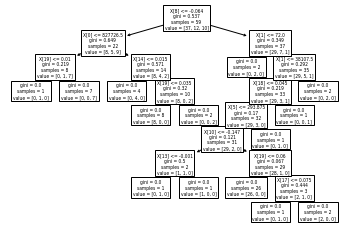

In [58]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x, y)
tree.plot_tree(clf)

In [59]:
clf.feature_importances_ 

array([0.14284845, 0.18024682, 0.        , 0.        , 0.        ,
       0.0535537 , 0.        , 0.        , 0.14116321, 0.        ,
       0.02561197, 0.        , 0.        , 0.03158458, 0.151606  ,
       0.        , 0.        , 0.04211278, 0.05605067, 0.17522182])

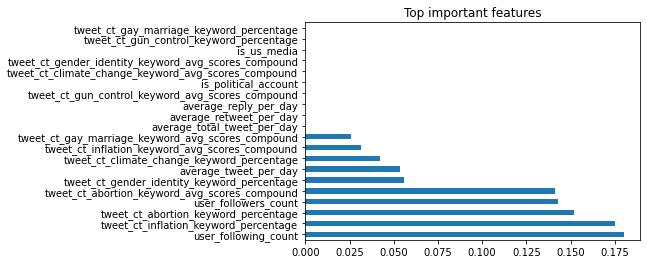

In [63]:
feat_importances = pd.Series(clf.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.title("Top important features")
plt.show()

In [60]:
model = SelectFromModel(clf, prefit=True)
x_new = model.transform(x)
x_new.shape

/Users/katherina/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


(59, 7)

In [68]:
embeded_rf_selector = SelectFromModel(clf, prefit=True)

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = x.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features:', embeded_rf_feature)

7 selected features: ['user_followers_count', 'user_following_count', 'average_tweet_per_day', 'tweet_ct_abortion_keyword_avg_scores_compound', 'tweet_ct_abortion_keyword_percentage', 'tweet_ct_gender_identity_keyword_percentage', 'tweet_ct_inflation_keyword_percentage']


[Text(0.5357142857142857, 0.9444444444444444, 'X[3] <= -0.064\ngini = 0.537\nsamples = 59\nvalue = [37, 12, 10]'),
 Text(0.2857142857142857, 0.8333333333333334, 'X[0] <= 827726.5\ngini = 0.649\nsamples = 22\nvalue = [8, 5, 9]'),
 Text(0.14285714285714285, 0.7222222222222222, 'X[8] <= 0.01\ngini = 0.219\nsamples = 8\nvalue = [0, 1, 7]'),
 Text(0.07142857142857142, 0.6111111111111112, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.21428571428571427, 0.6111111111111112, 'gini = 0.0\nsamples = 7\nvalue = [0, 0, 7]'),
 Text(0.42857142857142855, 0.7222222222222222, 'X[6] <= 0.015\ngini = 0.571\nsamples = 14\nvalue = [8, 4, 2]'),
 Text(0.35714285714285715, 0.6111111111111112, 'gini = 0.0\nsamples = 4\nvalue = [0, 4, 0]'),
 Text(0.5, 0.6111111111111112, 'X[8] <= 0.035\ngini = 0.32\nsamples = 10\nvalue = [8, 0, 2]'),
 Text(0.42857142857142855, 0.5, 'gini = 0.0\nsamples = 8\nvalue = [8, 0, 0]'),
 Text(0.5714285714285714, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.7857142

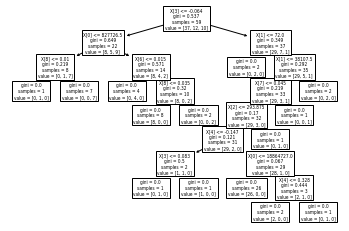

In [51]:
clf_new = tree.DecisionTreeClassifier()
clf_new = clf.fit(x_new, y)
tree.plot_tree(clf_new)

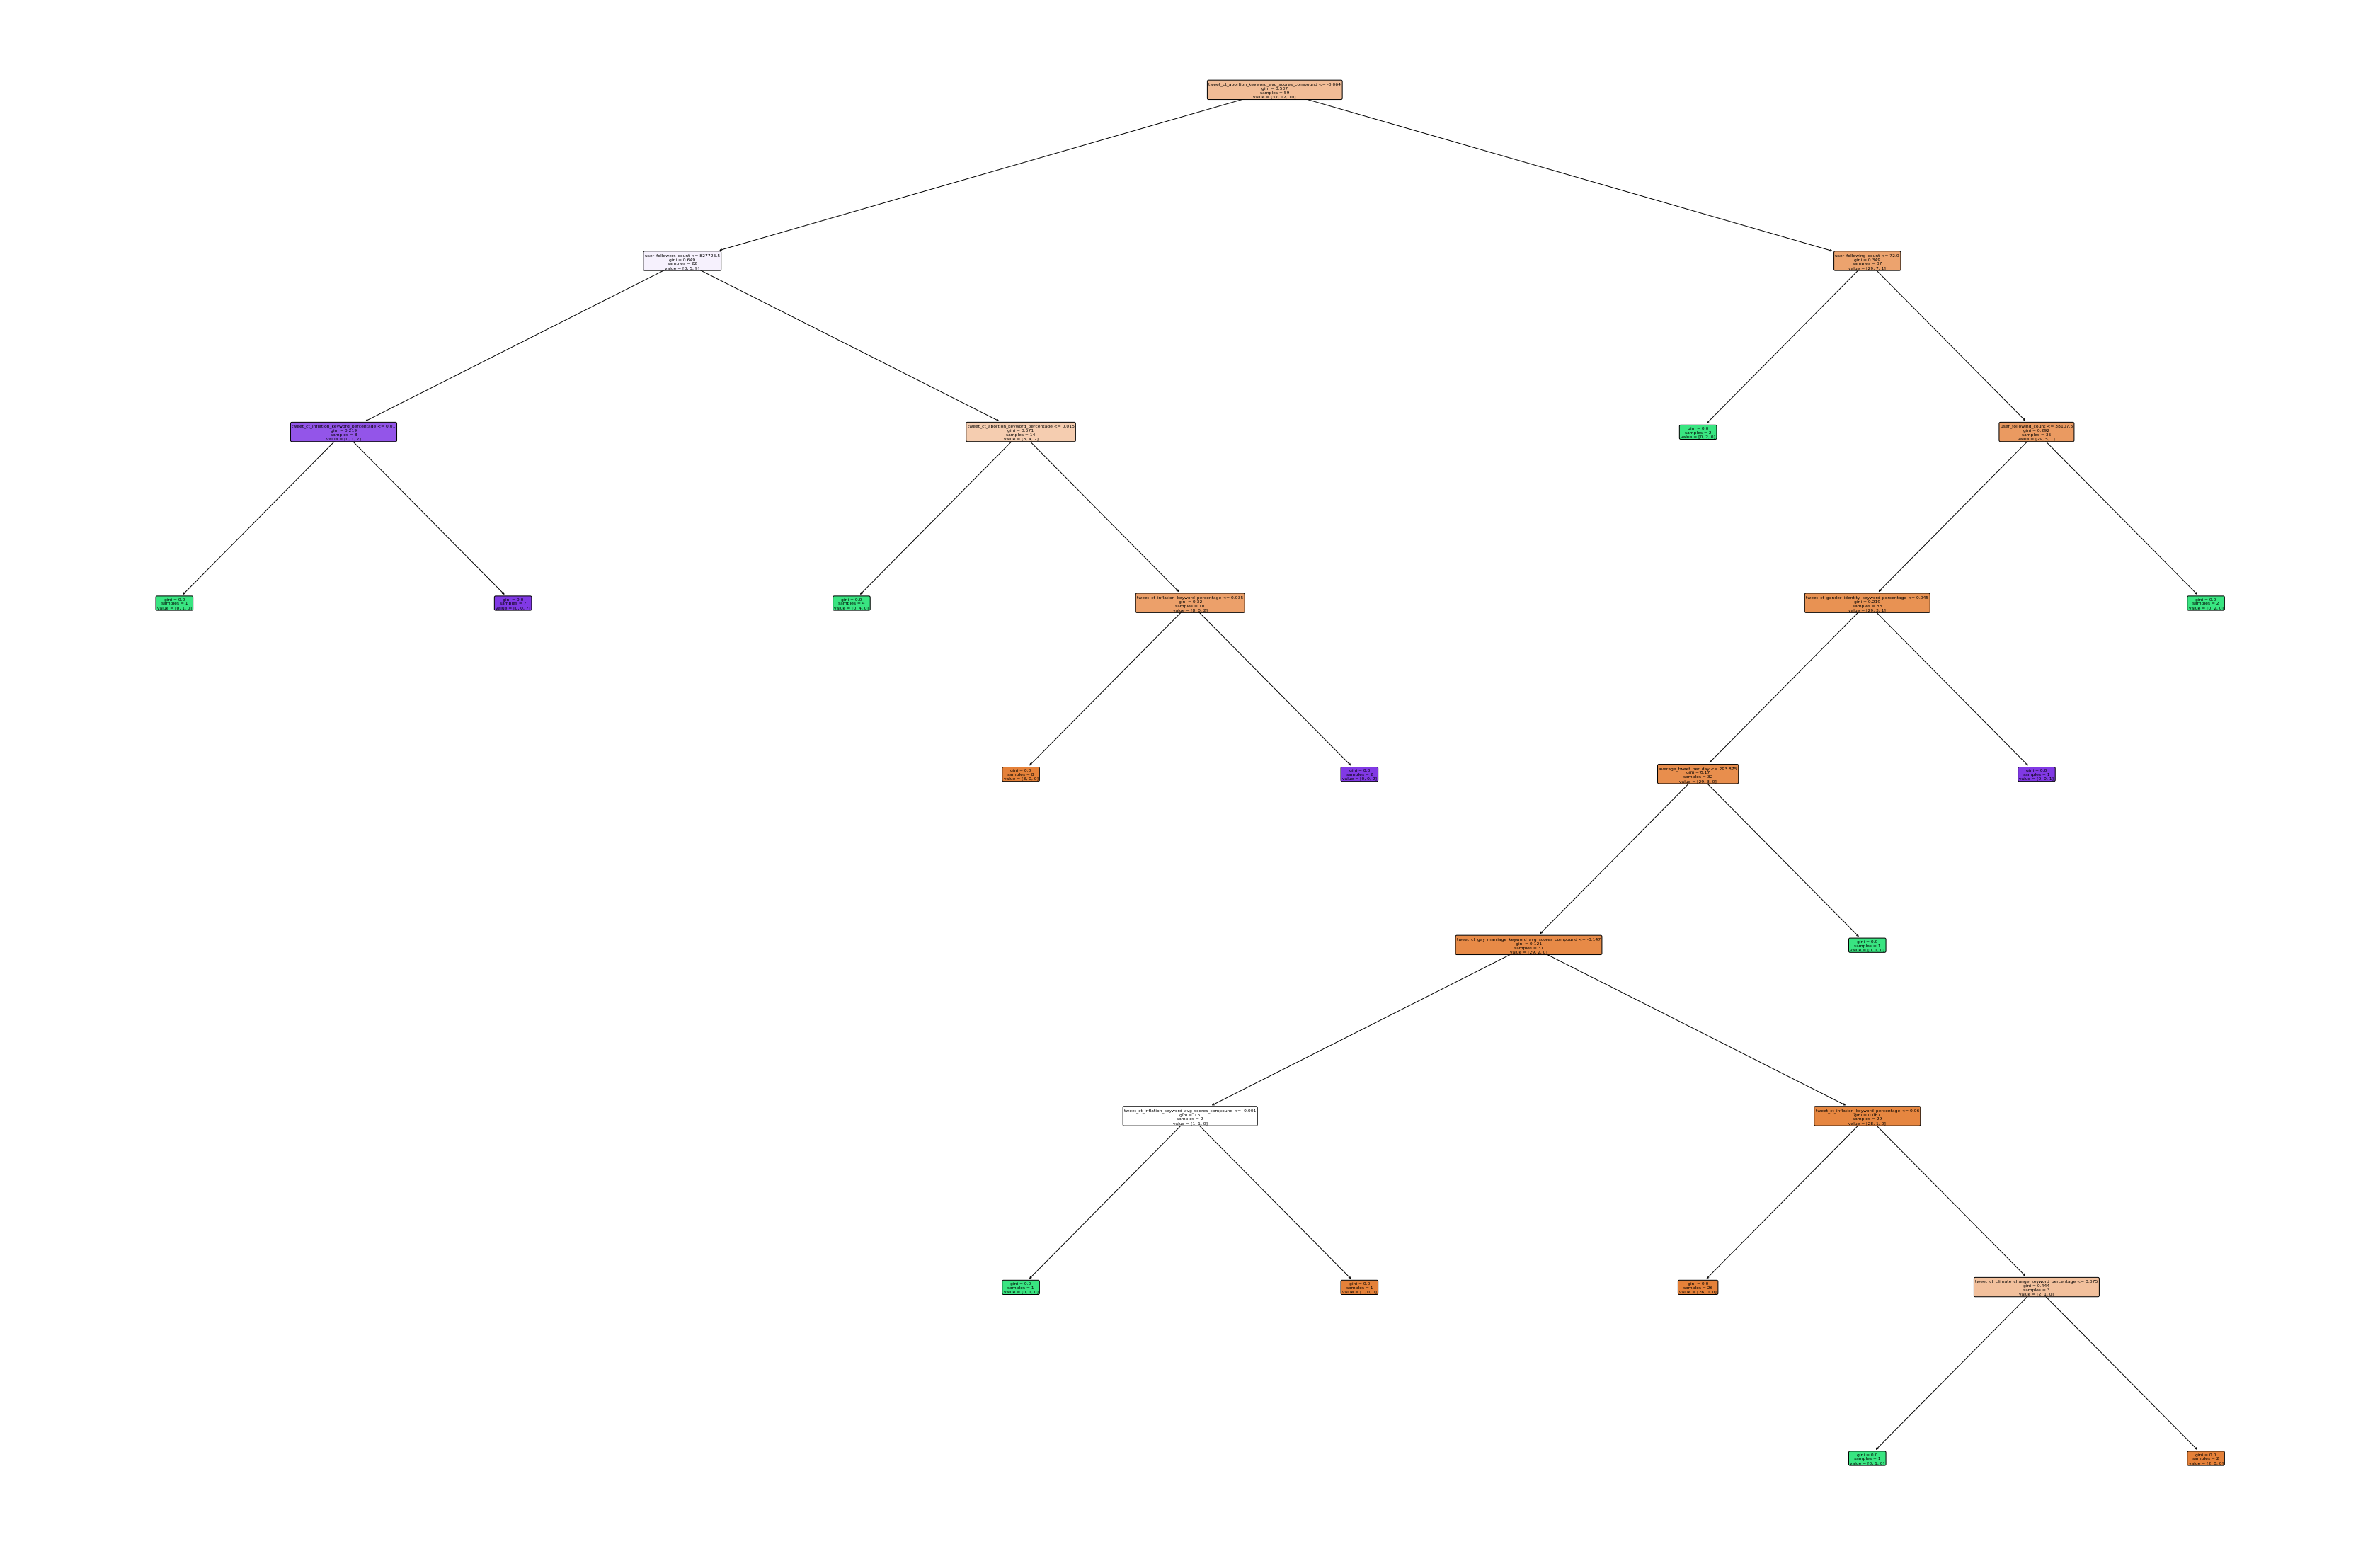

In [71]:
plt.figure(figsize=(60,40))  
_ = tree.plot_tree(clf, feature_names = x.columns, 
             filled=True, fontsize=6, rounded = True)
plt.show()